Questions asked from Data are:
- What was the best month for sales? 
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What product sold the most? 

###### Dataset

https://www.kaggle.com/code/brightezeoha/mobile-gadgets-accessories-store-data-analysis/data

In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'./all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###### Handling missing values 

<AxesSubplot:>

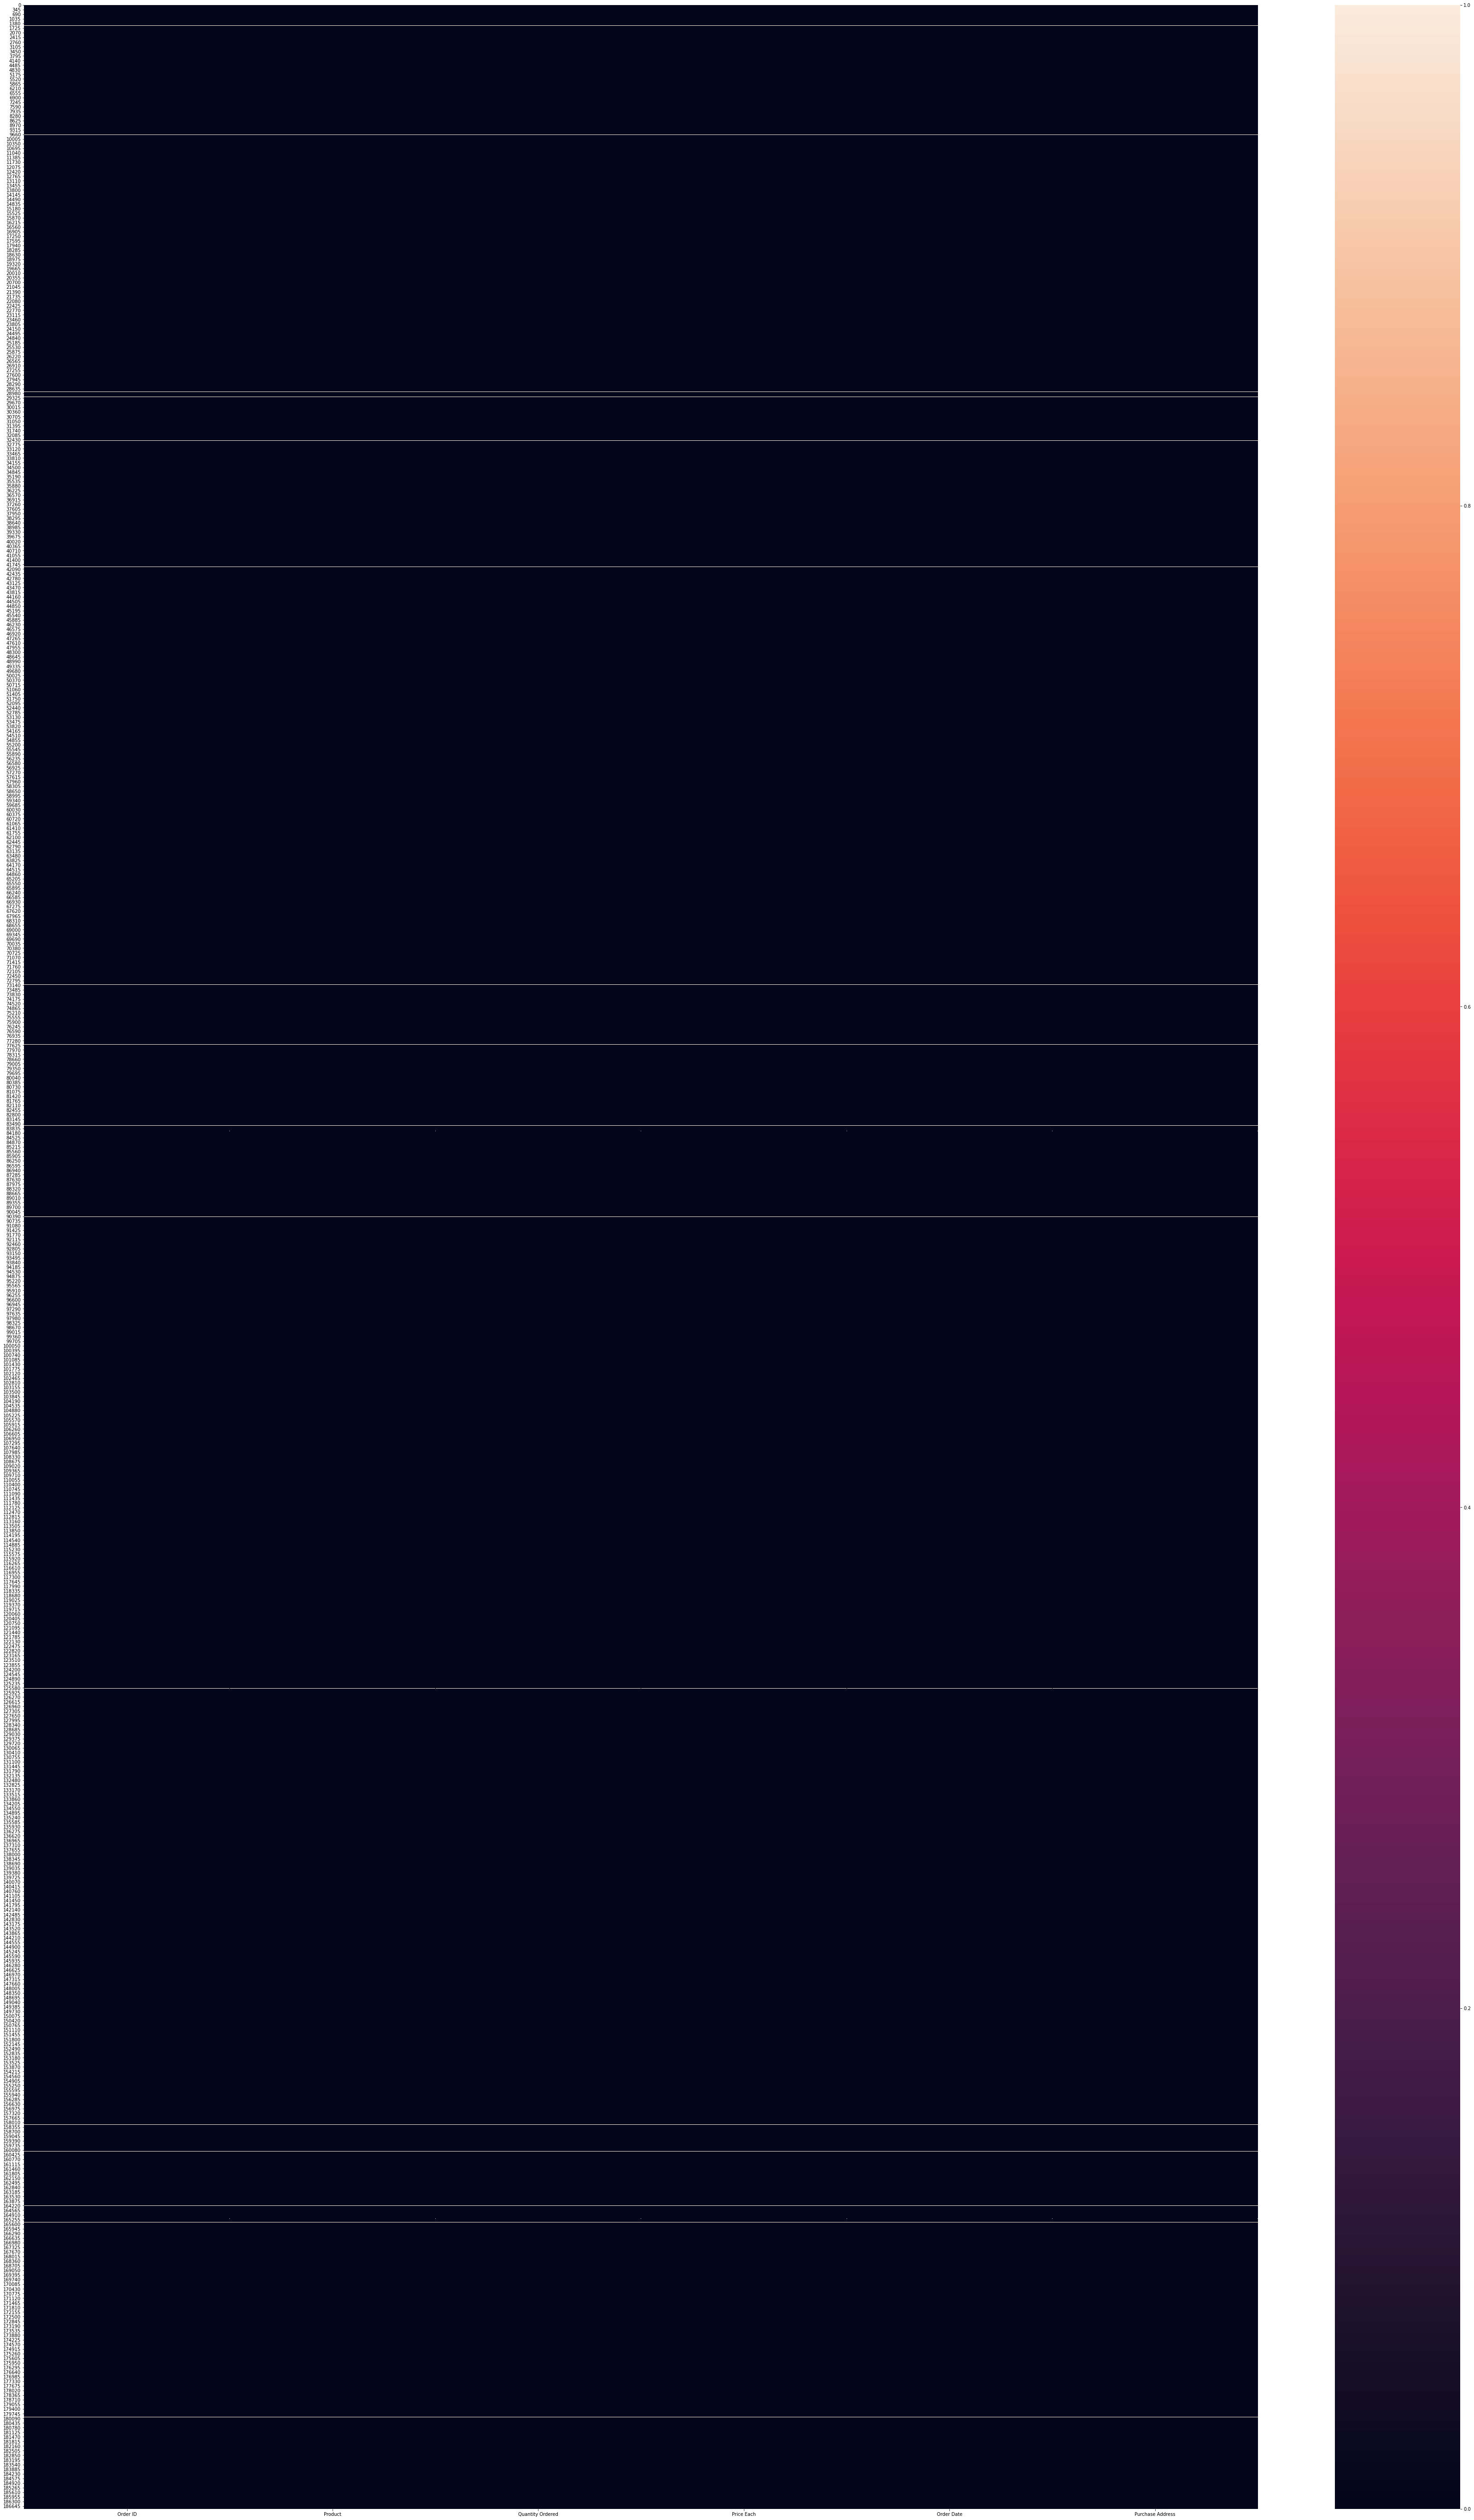

In [4]:
plt.figure(figsize=(60,100))   #Displaying Missing Values
sns.heatmap(df.isna())

In [5]:
s = df.isnull().all(axis=1)       # Getting index of all rows which are empty
s.head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [6]:
missing_row = s[s].index
missing_row

Int64Index([     1,    356,    735,   1433,   1553,   1571,   1992,   2265,
              2798,   3024,
            ...
            184408, 184546, 184836, 185017, 185100, 185176, 185438, 186042,
            186548, 186826],
           dtype='int64', length=545)

In [7]:
for i in missing_row:
    df.drop(i,axis=0,inplace=True)

In [8]:
df = df.reset_index(drop = True)

###### Droping rows having heading row unexpectedly

In [9]:
head = []
j=0
for i in df["Quantity Ordered"]:
    if(i == "Quantity Ordered"):
        head.append(j)
    j=j+1

In [10]:
for i in head:
    df.drop(i,axis=0,inplace=True)

In [11]:
df = df.reset_index(drop=True)

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###### Add sale column

In [13]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(float)

In [14]:
df["Price Each"] = df["Price Each"].astype(float)

In [15]:
df["Sale"] = df["Quantity Ordered"]* df["Price Each"]

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


#### Q1 What was the best month for sales?

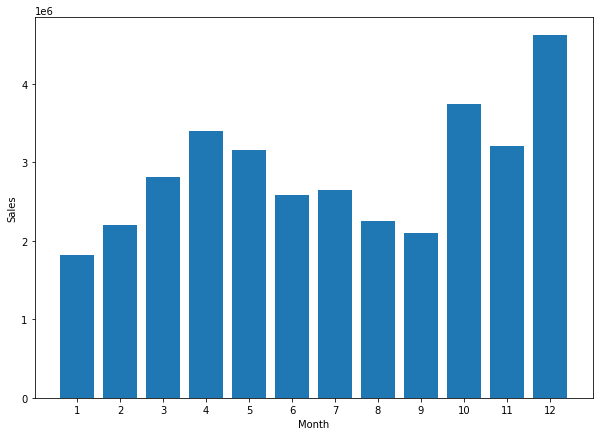

Highest sales occur in the month of December with 4613443 USD $


In [17]:
df["Month"] = df["Order Date"].str[:2]         #Add Month column
sellPerMonth = df.groupby('Month').sum()      

plt.figure(figsize=(10,7))
plt.bar(range(1,13),sellPerMonth['Sale'])
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()
print("Highest sales occur in the month of December with 4613443 USD $")

#### Q2 What city sold the most product?

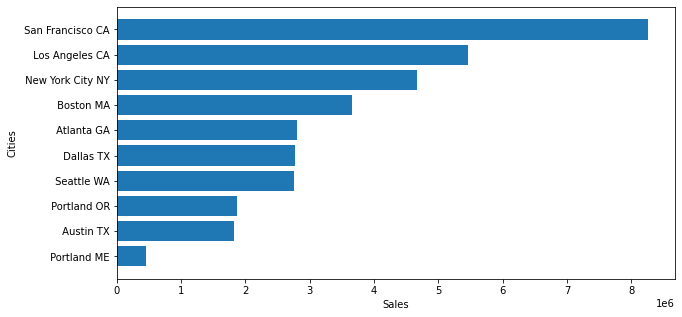

In [18]:
# getting the substring city and state from address
df['city'] = df['Purchase Address'].apply(lambda x: x.split(",")[1] +' '+ x.split(",")[2].split(" ")[1])

cities = df.groupby('city').sum().sort_values(by="Sale")  

plt.figure(figsize=(10,5))
plt.barh(cities.index,cities['Sale'])
plt.xlabel('Sales')
plt.ylabel('Cities')

plt.show()

#### Q3 What time should we display advertisemens to maximize the likelihood of customer’s buying product?

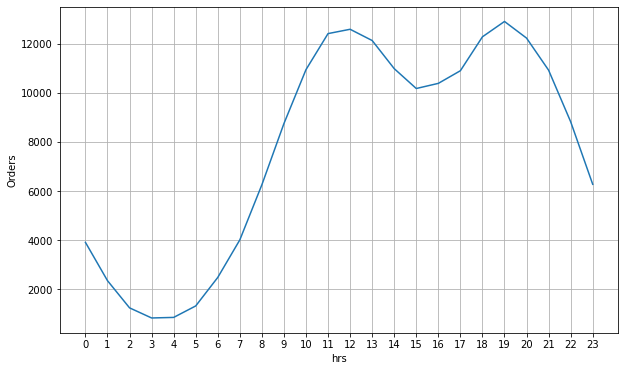

In [19]:
df['hour'] = pd.to_datetime(df['Order Date']).dt.hour
hour = df.groupby('hour').count()

plt.figure(figsize=(10,6))
plt.plot(hour.index,hour['Quantity Ordered'])
plt.xlabel("hrs")
plt.ylabel("Orders")
plt.xticks(range(0,24))
plt.grid()
plt.show()

#### Q4 Which product has been sold the most?

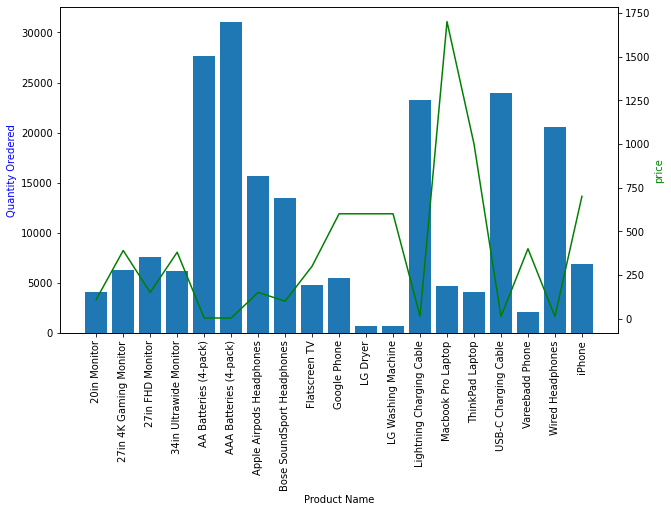

In [20]:
product = df.groupby('Product').sum('Quantity Ordered')
price = df.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()

ax1.bar(product.index,product['Quantity Ordered'])
ax2.plot(product.index,price,'g')

ax2.set_ylabel('price',color='g')

ax1.set_ylabel('Quantity Oredered',color='b')
ax1.set_xlabel('Product Name')

#ax1.set_xticklabels(product.index,rotation = 'vertical')
ax1.tick_params(axis='x', labelrotation = 90)
                   
plt.show()